# Gun Violence Data - Regression Analysis
### Regression Analysis for Gun Violence Data (2014-2021)

#### This script contains following:
1. Import data and libraries
2. Data prepping for regression analysis
3. Performing regression analysis
4. Final result analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#define path 
path=r'/Users/yeji/Documents/Career Foundry/Achievement 6'

In [4]:
#import data
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'data_with_regions.csv'), index_col = 0)

In [5]:
#check head
df.head()

,incident_id,incident_date,month,day,year,state,city_or_county,address,killed,injured,Regions,year category
0,2201535,December 31 2021,December,31,2021,Maryland,Capitol Heights,Cindy Ln,0,4,South,early 2020s
1,2201716,December 31 2021,December,31,2021,Mississippi,Gulfport,1200 block of Lewis Ave,3,4,South,early 2020s
2,2201216,December 31 2021,December,31,2021,California,Los Angeles,10211 S. Avalon Blvd,0,6,West,early 2020s
3,2200968,December 30 2021,December,30,2021,Pennsylvania,Philadelphia,5100 block of Germantown Ave,0,6,Northeast,early 2020s
4,2201052,December 30 2021,December,30,2021,Missouri,Kirksville,700 block of E Dodson St,2,2,Midwest,early 2020s


In [6]:
#check shape
df.shape

(3389, 12)

<AxesSubplot:xlabel='killed'>

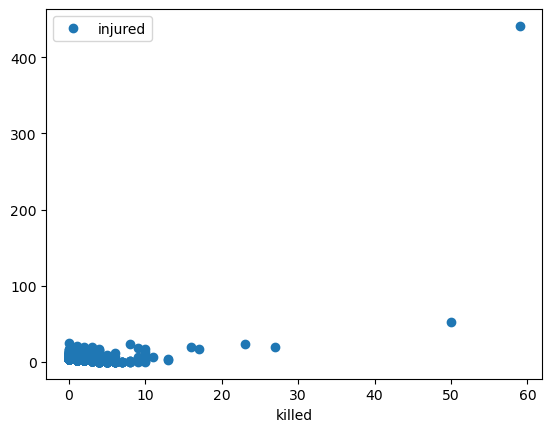

In [17]:
#check for extreme via scatterplot
df.plot(x = 'killed', y='injured',style='o')

2 dots in the scatterplot around 50 and 400 are an extreme values and needs to be removed for the purpose of regression analysis

In [23]:
#remove extreme
df_new = df[df['injured']<50]

<AxesSubplot:xlabel='injured'>

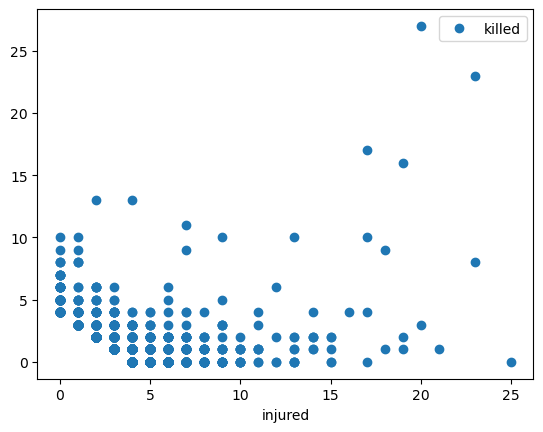

In [24]:
#check new scatterplot
df_new.plot(x = 'injured', y='killed',style='o')

## Hypothesis
If numbers of individuals injured increases,than number of individuals killed will increase

## Regression analysis prep 

In [36]:
# Reshaping variables into Numpy arrays

X = df_new['injured'].values.reshape(-1,1)
y = df_new['killed'].values.reshape(-1,1)

In [37]:
X

array([[4],
       [4],
       [6],
       ...,
       [3],
       [3],
       [2]])

In [38]:
y

array([[0],
       [3],
       [0],
       ...,
       [1],
       [1],
       [2]])

In [39]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [40]:
# Create a regression object
regression = LinearRegression() 

In [41]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

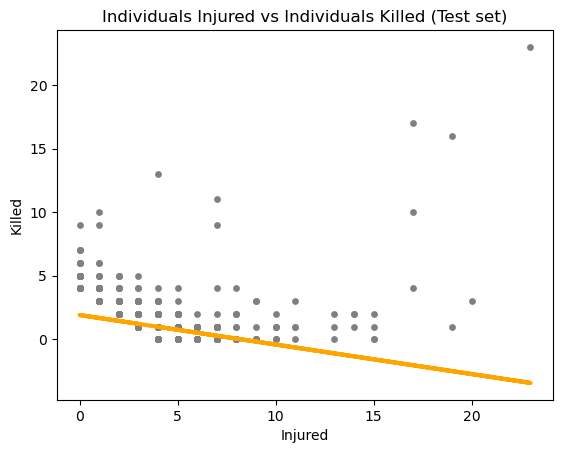

In [43]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Individuals Injured vs Individuals Killed (Test set)')
plot_test.xlabel('Injured')
plot_test.ylabel('Killed')
plot_test.show()

In [44]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [45]:
#check model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.23227193]]
Mean squared error:  3.40452509077437
R2 score:  -0.04957300429453215


#### Analysis
The slope is a negative value, which means that there is a negative relationship between indivduals injured and killed. This contradicts the hypthosis that was made, which assumed more injured would mean more killed. 
The mean squared error is small, which shows that the line is close to the set of points but the r2 value of -0.05 indicates that the line is not the best fit of the data. 

In [46]:
# Check dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.213220
1,5,1.677763
2,1,1.213220
3,1,0.516404
4,0,0.748676
5,0,0.748676
6,0,0.516404
7,0,0.980948
8,3,1.677763
9,0,0.980948


### Final Analysis
The dataframe with actual and predicted y values show a large discrepency, which indicates that the model is not the best representative of the relationship between the x and y variables. Therefore, I need to see if there is another way to find the relationship between the injured and the killed. Also, I excluded the extreme values which might have impacted the model as well. 